# Planejamento
#### Análise dos dados:
- Verificar nulos;
- Verificar tipo dos dados;
- Verificar desbalanceamento da target;
- Verificar dimensão dos dados.

#### Tratamento:
- Dropar features irrelevantes;
- Tratar nulos e desbalanceamento se necessário. 
- Separar df de treino, teste e validação;
- Normalizar os dados de cada df.

#### Treinamento:
- Treinar KNeighborsClassifier com dados iniciais;
- Treinar GaussianNB com dados iniciais;
- Treinar LogisticRegression com dados iniciais;
- Treinar GradientBoostingClassifier com dados iniciais;
- Treinar XGBoostClassifier com dados iniciais.

#### Teste:
- Verificar desempenho de cada modelo;
- Analisar Precisão, F1-Score e curva AUC-ROC.

#### Para melhorar os modelos: 
- Melhorar os parâmetros de cada classificador;
- Feature Engineering (SelectBest, chi2, RFE, Lasso). Vide Aula 34 - Feature Engineering.
- Redução de dimensionalidade (PCA). 

# Análise dos dados.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#Mostrar todas as colunas do df
pd.set_option('display.max_columns', None)

#Desabilitar warnings
import warnings
warnings.filterwarnings("ignore")

#Lendo o arquivo csv
df = pd.read_csv('creditcard.csv')

In [46]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
#Verificar valores nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
#Verificar tipo dos dados
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [49]:
#Verificar desbalanceamento da target.
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [50]:
#Verificar dimensão dos dados.
df.loc[df.Class == 0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [51]:
df.loc[df.Class == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

-

Observações da análise inicial:
  - Não há valores nulos no df.
  - Não há necessidade de mudar o tipo dos dados. 
  - Existe um desbalanceamento bem alto da variável target que precisa ser tratado.
  - A maior parte dos dados trata-se de não fraude. 
  - A média de gasto é maior em casos de fraude.
  - O valor máximo de transação é consideravelmente menor em casos de fraude.

# Tratamento

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [165]:
#Dropar features irrelevantes
df.drop(columns=['Time'], inplace=True)

In [166]:
#Tratar desbalanceamento da target
df_balanced = pd.concat([df[df.Class == 0].sample(n=492), df[df.Class == 1]], axis=0)

In [167]:
df_balanced.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [168]:
df_balanced.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-2.357166,1.743456,-3.548568,2.318287,-1.552389,-0.666255,-2.787316,0.305754,-1.277298,-2.836496,1.896864,-3.177430,-0.017863,-3.475991,-0.077621,-2.026909,-3.312202,-1.110518,0.348586,0.171691,0.362664,0.020813,-0.038061,-0.059350,0.007398,0.031553,0.081382,0.033990,110.425640,0.500000
std,5.614112,3.892289,6.206378,3.204562,4.215721,1.777521,5.847993,4.852041,2.335454,4.527064,2.766597,4.567513,1.051120,4.665731,0.996910,3.498344,5.982497,2.412877,1.285364,1.169851,2.792635,1.177336,1.371214,0.566550,0.690309,0.487503,1.080109,0.470612,232.795045,0.500254
min,-33.404082,-38.436817,-31.103685,-3.774039,-22.105532,-9.674221,-43.557242,-41.044261,-13.434066,-24.588262,-2.706185,-18.683715,-3.394164,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-15.841459,-22.797604,-8.887017,-22.575000,-2.028024,-4.781606,-1.156407,-8.878665,-5.944923,0.000000,0.000000
25%,-2.762972,-0.229822,-5.120349,-0.031508,-1.780802,-1.576412,-3.078361,-0.207644,-2.331368,-4.572043,-0.148058,-5.495221,-0.757219,-6.721799,-0.698276,-3.543426,-5.302111,-1.772498,-0.450697,-0.185497,-0.158126,-0.508875,-0.253165,-0.415078,-0.321492,-0.289852,-0.062192,-0.058206,1.590000,0.000000
50%,-0.736998,0.930315,-1.465537,1.380583,-0.390975,-0.602551,-0.610289,0.167191,-0.765244,-0.887982,1.017332,-0.970948,-0.047316,-1.019512,-0.030998,-0.528182,-0.505817,-0.334422,0.238193,0.025683,0.159829,0.054120,-0.035460,-0.020402,0.047265,-0.018916,0.043265,0.035144,18.300000,0.500000
75%,1.058702,2.777569,0.300061,4.250632,0.468830,0.131143,0.260349,0.865297,0.244092,0.051299,3.586130,0.164636,0.666027,0.108155,0.597239,0.323747,0.279150,0.395284,1.030734,0.447240,0.662005,0.575996,0.196043,0.365992,0.390563,0.331217,0.451781,0.209869,99.990000,1.000000
max,2.312026,22.057729,3.261333,12.699542,12.785108,6.474115,5.802537,20.007208,5.882570,4.856236,12.018913,2.815817,3.159795,3.442422,2.969389,3.294011,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,2.070945,2.208209,2.745261,9.200883,2.440756,2125.870000,1.000000


In [169]:
#Criar df para validar os modelos
df_validation = pd.concat([df_balanced.head(), df_balanced.tail()], axis=0)
df_validation.reset_index(drop=True, inplace=True)
df_validation_target = df_validation.Class
df_validation = df_validation.drop(['Class'], axis=1)

In [170]:
#Remover linhas de validação do df principal
df_balanced = df_balanced.iloc[5:]
df_balanced = df_balanced.iloc[:-5]
df_balanced.reset_index(drop=True, inplace=True)
df_balanced

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.768053,-1.650568,2.276242,-1.704634,0.713584,0.155623,-1.237403,0.595309,-0.543314,-0.264537,-0.293757,-0.172860,-0.133648,-0.270560,0.111829,-0.235127,-1.260138,2.934896,-1.329373,0.000388,0.045130,-0.009800,0.009896,0.018760,0.520482,-0.256772,0.017485,0.098964,74.57,0
1,-1.279805,1.665795,0.277386,0.033711,-0.520418,-0.930447,-0.062505,0.847734,-0.416237,-0.634009,-0.913125,-0.204348,-0.330283,0.241234,0.933057,0.746107,0.242315,0.118095,0.007265,0.003237,-0.238605,-0.860055,0.053408,-0.046672,-0.038565,0.104836,0.105520,0.011029,11.98,0
2,1.130571,-1.663822,0.483958,-1.173781,-1.979848,-0.863784,-0.881939,-0.175498,-1.629329,1.350297,-0.578867,-1.302819,-0.310639,-0.163085,0.875433,-0.120474,0.479166,0.064681,-0.292877,0.012070,-0.262810,-0.885029,0.020149,0.320222,0.032000,-0.427631,0.000949,0.061448,205.48,0
3,-0.008670,-1.298365,0.293182,-2.725705,-0.572905,1.518626,-0.342559,0.487447,-1.851473,0.813405,0.347309,-0.990082,-0.726441,-0.192052,-0.280008,-0.830908,0.723956,-0.306921,-0.983617,-0.210183,0.097009,0.507178,0.372159,-1.705440,-0.666929,-0.139161,0.086496,0.031114,158.00,0
4,2.033286,-0.146397,-1.422721,0.092454,0.138430,-0.658183,-0.002164,-0.096402,0.634888,0.098158,0.846721,0.485537,-1.009429,0.868400,0.301818,-0.041372,-0.722838,0.706302,0.088581,-0.279868,0.309116,0.954656,0.020578,0.761406,0.281071,-0.472299,-0.006479,-0.058524,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,2.688670,-1.475145,-0.050468,0.113500,0.984344,0.363969,-0.674357,0.327464,0.091470,1.307941,2.493224,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
970,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,-2.516628,0.874052,-2.513104,0.021575,-3.565119,0.461153,-2.015713,-1.731413,-0.465815,0.527620,0.190877,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
971,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,1.334414,1.032016,-0.722023,-1.533240,0.334119,0.297479,-0.429392,-0.824644,0.489668,0.873344,0.033804,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
972,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,0.249311,1.338318,-0.329759,-0.363591,-1.824839,-0.229679,1.842347,1.194212,0.037467,0.423099,0.037438,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1


In [171]:
df_balanced.Class.value_counts()

1    487
0    487
Name: Class, dtype: int64

In [173]:
#Separar df de treino, teste
X = df_balanced.drop(columns=['Class'])
y = df_balanced.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
#Normalizar os dados de cada df
minmax = MinMaxScaler(feature_range=(0,1))

scaler = minmax.fit_transform(X_train)
X_train = pd.DataFrame(scaler, columns = X_train.columns)

scaler = minmax.fit_transform(X_test)
X_test = pd.DataFrame(scaler, columns = X_test.columns)

scaler = minmax.fit_transform(df_validation)
df_validation = pd.DataFrame(scaler, columns = df_validation.columns)

In [177]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,779.0,0.869257,0.159750,0.0,0.858616,0.915023,0.965849,1.0
V2,779.0,0.671135,0.066178,0.0,0.637386,0.657306,0.689349,1.0
V3,779.0,0.800518,0.183675,0.0,0.754765,0.861911,0.913841,1.0
V4,779.0,0.372641,0.194800,0.0,0.230583,0.314883,0.488836,1.0
V5,779.0,0.588076,0.123059,0.0,0.580379,0.622349,0.646958,1.0
V6,779.0,0.571768,0.112278,0.0,0.513925,0.577015,0.623333,1.0
V7,779.0,0.819185,0.120899,0.0,0.807616,0.865001,0.882907,1.0
V8,779.0,0.667945,0.078330,0.0,0.657379,0.663864,0.675570,1.0
V9,779.0,0.629035,0.120948,0.0,0.573465,0.655534,0.708179,1.0
V10,779.0,0.737485,0.152056,0.0,0.678315,0.801850,0.835797,1.0


In [178]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,195.0,0.847320,0.173131,0.0,0.828133,0.901507,0.954768,1.0
V2,195.0,0.332047,0.121199,0.0,0.270639,0.305668,0.359951,1.0
V3,195.0,0.790704,0.191735,0.0,0.746597,0.860609,0.910389,1.0
V4,195.0,0.368006,0.212707,0.0,0.205119,0.308873,0.507297,1.0
V5,195.0,0.607482,0.137526,0.0,0.606040,0.645675,0.674299,1.0
V6,195.0,0.419139,0.149985,0.0,0.349093,0.419188,0.470714,1.0
V7,195.0,0.855292,0.136151,0.0,0.858973,0.905022,0.924799,1.0
V8,195.0,0.703963,0.099434,0.0,0.702891,0.708477,0.721042,1.0
V9,195.0,0.716678,0.142046,0.0,0.655151,0.760448,0.805661,1.0
V10,195.0,0.794481,0.180459,0.0,0.730268,0.876346,0.904260,1.0


In [179]:
df_validation.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,10.0,0.546063,0.329340,0.0,0.385922,0.443573,0.820427,1.0
V2,10.0,0.543575,0.307329,0.0,0.316196,0.575541,0.761321,1.0
V3,10.0,0.472795,0.346969,0.0,0.203036,0.482242,0.615556,1.0
V4,10.0,0.491347,0.405352,0.0,0.072392,0.508315,0.843149,1.0
V5,10.0,0.404027,0.344832,0.0,0.127717,0.350662,0.653563,1.0
V6,10.0,0.421755,0.267943,0.0,0.290799,0.448264,0.511122,1.0
V7,10.0,0.376667,0.305223,0.0,0.180882,0.360058,0.491782,1.0
V8,10.0,0.441618,0.333649,0.0,0.241982,0.360759,0.705639,1.0
V9,10.0,0.507458,0.345919,0.0,0.344379,0.399359,0.796465,1.0
V10,10.0,0.572455,0.351653,0.0,0.365835,0.708889,0.784032,1.0


-

Todos os dfs estão com min=0 e max=1.

# Treinamento e Teste

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc

In [185]:
classifiers = [KNeighborsClassifier(),
               GaussianNB(),
               LogisticRegression(dual = False, max_iter = 5000),
               GradientBoostingClassifier(),
               XGBClassifier()]


KNeighborsClassifier
Precision:100.00%
Recall:83.51%
F1-Score:91.01%

Validação
   Target  Predict
0       0        0
1       0        0
2       0        0
3       0        0
4       0        0
5       1        1
6       1        1
7       1        1
8       1        1
9       1        0



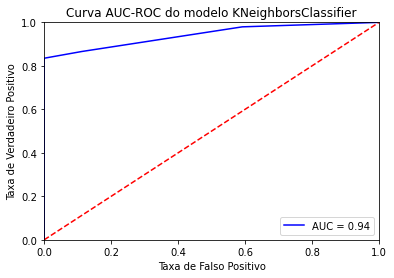


GaussianNB
Precision:49.74%
Recall:100.00%
F1-Score:66.44%

Validação
   Target  Predict
0       0        1
1       0        1
2       0        1
3       0        1
4       0        1
5       1        1
6       1        1
7       1        1
8       1        1
9       1        1



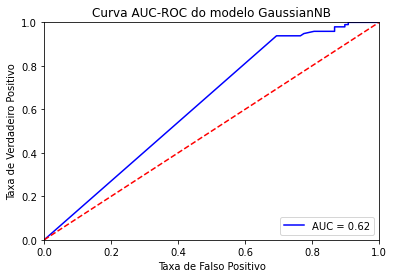


LogisticRegression
Precision:100.00%
Recall:78.35%
F1-Score:87.86%

Validação
   Target  Predict
0       0        0
1       0        1
2       0        0
3       0        1
4       0        0
5       1        1
6       1        1
7       1        1
8       1        1
9       1        1



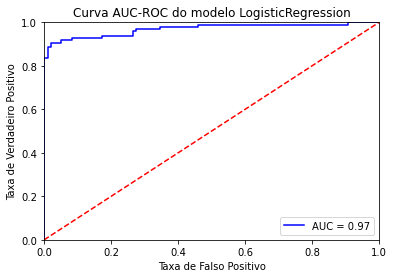


GradientBoostingClassifier
Precision:97.59%
Recall:83.51%
F1-Score:90.00%

Validação
   Target  Predict
0       0        0
1       0        1
2       0        0
3       0        1
4       0        0
5       1        1
6       1        1
7       1        1
8       1        1
9       1        1



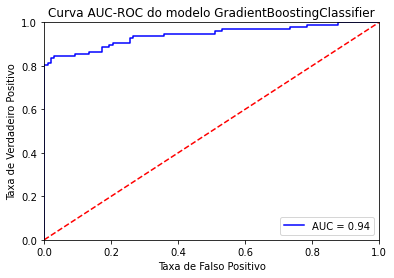

[02:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBClassifier
Precision:98.78%
Recall:83.51%
F1-Score:90.50%

Validação
   Target  Predict
0       0        0
1       0        0
2       0        0
3       0        1
4       0        0
5       1        1
6       1        1
7       1        1
8       1        1
9       1        1



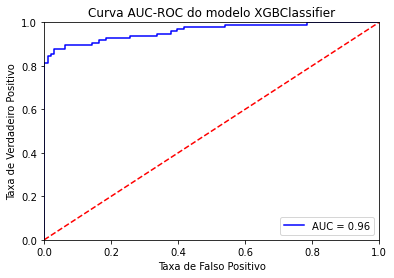

In [186]:
for clf in classifiers:
    
    #Treinar todos os classificadores
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
        
    print('')
    print(clf.__class__.__name__)
    
    #Imprimir as métricas
    print("Precision:{:.2f}%".format(precision_score(y_test,y_pred)*100))
    print("Recall:{:.2f}%".format(recall_score(y_test,y_pred)*100))
    print("F1-Score:{:.2f}%".format(f1_score(y_test,y_pred)*100))
    
    #Testar no df de validação
    y_pred_validation = clf.predict(df_validation)
    print('')
    print('Validação')
    print(pd.DataFrame({'Target':df_validation_target, 'Predict':y_pred_validation}))
    
    #Calcular a curva AUC-ROC
    proba = clf.predict_proba(X_test)
    pred = proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    
    #Plotar a curva AUC-ROC
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    
    #Redefinir os eixos
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
    #Formatar os labels
    plt.title(f'Curva AUC-ROC do modelo {clf.__class__.__name__}')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.xlabel('Taxa de Falso Positivo')
    plt.legend(loc = 'lower right')
    print('')
    plt.show()

- Analisando os resultados podemos descartar o GaussianNB.
- Ele teve um recall alto pois classificou a maioria dos dados como positivos.
- Porém isso gera um número alto de falsos positivos.
- O que explica a precisão baixa.
- Em todos os casos, as métricas refletiram bem o resultado da validação. 

- KNeighborsClassifier, LogisticRegression, GradientBoostingClassifier e XGBClassifier vou manter e melhorar os parâmetros pra tentar melhorar a performance. 